# Import Statements

In [1]:
import pandas as pd
import numpy as np
import string
import os
import pickle
import random
import matplotlib.pyplot as plt
import math
import operator
from tqdm import tqdm

# Read From File

In [2]:
def read_from_file(file_path):
    '''
    Parameters:
        file_path: type(string)
    
    Returns: Data read from file
    '''
    file = open(file_path, 'r', encoding='utf-8', errors='ignore')
    file_data = file.read()
    file.close()
    
    return file_data

# Helper Functions

In [3]:
def plot_graph(data, label_x, label_y):
    '''
    Parameters:
        data: type(list)
        label_x: type(string)
        label_y: type(string)
    '''
    distribution = {}
    for data_point in data:
        if(data_point in distribution.keys()):
            distribution[data_point]+=1
        else:
            distribution[data_point]=1
    
    x = sorted(distribution.keys())
    y = [distribution[val]/len(data) for val in x]
    
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.plot(x,y)
    plt.show()
    
    return x,y

In [4]:
def create_graph(graph_data):
    '''
    Parameters:
        file_data: type(string)
        num_of_nodes: type(int)
    
    Returns: adjacency matrix, edge list, number of edges, in-degree list and out-degree list of the graph data present in file_data
    '''
    node_dict = {}
    reverse_node_dict = {}
    node_no = 0
    lines = graph_data.splitlines()
    
    num_of_nodes = int(lines[2].split()[2])
    num_of_edges = int(lines[2].split()[4])
    
    for line_no in range(4,len(lines)):
        node_pair = lines[line_no].split()
        u,v = int(node_pair[0]),int(node_pair[1])
        if(u not in node_dict.keys()):
            node_dict[u] = node_no
            reverse_node_dict[node_no] = u
            node_no+=1
        if(v not in node_dict.keys()):
            node_dict[v] = node_no
            reverse_node_dict[node_no] = v
            node_no+=1
    
    adjacency_matrix = np.zeros((num_of_nodes,num_of_nodes))
    edge_list = []
    in_degree_list = np.zeros(num_of_nodes, dtype=np.int64)
    out_degree_list = np.zeros(num_of_nodes, dtype=np.int64)
    
    for i in range(num_of_nodes):
        edge_list.append([])
    
    for line_no in range(4,len(lines)):
        node_pair = lines[line_no].split()
        u, v = node_dict[int(node_pair[0])], node_dict[int(node_pair[1])]
        adjacency_matrix[u][v]+=1
        edge_list[u].append(v)
        in_degree_list[v]+=1
        out_degree_list[u]+=1
    
    return adjacency_matrix, edge_list, num_of_nodes, num_of_edges, in_degree_list, out_degree_list, node_dict, reverse_node_dict

In [5]:
def get_clustering_coefficient_list(adjacency_matrix, edge_list, num_of_nodes):
    '''
    Parameters:
        adjacency_matrix: type(ndarray)
        edge_list: type(list)
        num_of_nodes: type(int)
    
    Returns: List of Clustering Coefficient for each Node
    '''
    undirected_adj_matrix = np.zeros((num_of_nodes, num_of_nodes))
    undirected_adj_list = [[] for i in range(num_of_nodes)]
    
    for node_i in tqdm(range(num_of_nodes)):
        if(adjacency_matrix[node_i][node_i]!=0):
            undirected_adj_matrix[node_i][node_i] = 1
        for node_j in range(node_i+1,num_of_nodes):
            if(adjacency_matrix[node_i][node_j]!=0 or adjacency_matrix[node_j][node_i]!=0):
                undirected_adj_matrix[node_i][node_j] += 1
                undirected_adj_matrix[node_j][node_i] += 1
                undirected_adj_list[node_i].append(node_j)
                undirected_adj_list[node_j].append(node_i)

    clustering_coefficient_list = []
    for node_v in tqdm(range(num_of_nodes)):
        Kv = len(undirected_adj_list[node_v])
        if Kv == 0 or Kv == 1:
            clustering_coefficient_list.append(0)
        else:
            Nv = 0
            for i in range(Kv):
                for j in range(i+1, Kv):
                    neighbour_1 = undirected_adj_list[node_v][i]
                    neighbour_2 = undirected_adj_list[node_v][j]
                    if undirected_adj_matrix[neighbour_1][neighbour_2]!=0:
                        Nv += 1
            clustering_coefficient_list.append((2*Nv)/(Kv*(Kv-1)))
    return clustering_coefficient_list

# Main

In [6]:
def main():
    # Read graph data
    graph_data = read_from_file('Dataset/Wiki-Vote.txt')
    adjacency_matrix, edge_list, num_of_nodes, num_of_edges, in_degree_list, out_degree_list, node_dict, reverse_node_dict = create_graph(graph_data)
    
    # Number of Nodes
    print('Number of Nodes: {}'.format(num_of_nodes))
    
    # Number of Edges
    print('Number of Edges: {}'.format(num_of_edges))
    
    # Average In-Degree
    avg_in_degree = np.sum(in_degree_list)/num_of_nodes
    print('Average In-Degree: {}'.format(avg_in_degree))
    
    # Average Out-Degree
    avg_out_degree = np.sum(out_degree_list)/num_of_nodes
    print('Average Out-Degree: {}'.format(avg_out_degree))
    
    # Node(s) with Max In-degree
    nodes_with_max_in_degree = []
    max_in_degree = np.amax(in_degree_list)
    for node in range(num_of_nodes):
        if(in_degree_list[node]==max_in_degree):
            nodes_with_max_in_degree.append(node)
    for node in nodes_with_max_in_degree:
        print('Node with Max In-Degree is: {} with In-Degree: {}'.format(reverse_node_dict[node], in_degree_list[node]))
    
    # Node(s) with Max Out-degree
    nodes_with_max_out_degree = []
    max_out_degree = np.amax(out_degree_list)
    for node in range(num_of_nodes):
        if(out_degree_list[node]==max_out_degree):
            nodes_with_max_out_degree.append(node)
    for node in nodes_with_max_out_degree:
        print('Node with Max Out-Degree is: {} with Out-Degree: {}'.format(reverse_node_dict[node], out_degree_list[node]))
    
    # Density of the network
    num_of_possible_edges = num_of_nodes*(num_of_nodes-1)
    print('Density of the network: {}'.format(num_of_edges/num_of_possible_edges))
    
    # In-Degree Distribution
    plot_graph(in_degree_list, 'In-Degree', 'In-Degree Distribution')
    
    # Out-Degree Distribution
    plot_graph(out_degree_list, 'Out-Degree', 'Out-Degree Distribution')
    
    # Clustering Coefficient Distribution
    clustering_coefficient_list = get_clustering_coefficient_list(adjacency_matrix, edge_list, num_of_nodes)
    #clustering_coefficient_list = fun(adjacency_matrix, edge_list, num_of_nodes)
    #for x in clustering_coefficient_list:
    #    print(x)
    plot_graph(clustering_coefficient_list, 'Local Clustering Coefficient', 'Local Clustering Coefficient Distribution')

Number of Nodes: 7115
Number of Edges: 103689
Average In-Degree: 14.573295853829936
Average Out-Degree: 14.573295853829936
Node with Max In-Degree is: 4037 with In-Degree: 457
Node with Max Out-Degree is: 2565 with Out-Degree: 893
Density of the network: 0.0020485375110809584


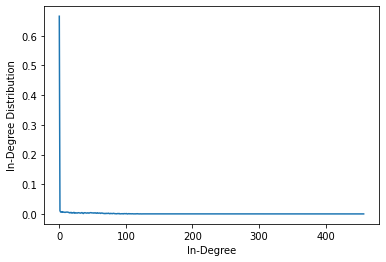

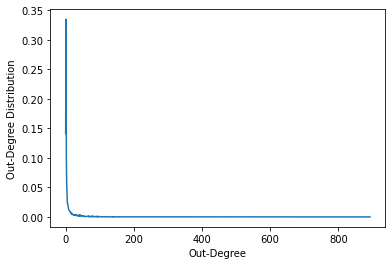

100%|█████████████████████████████████████████████████████████████████████████████| 7115/7115 [00:08<00:00, 862.14it/s]


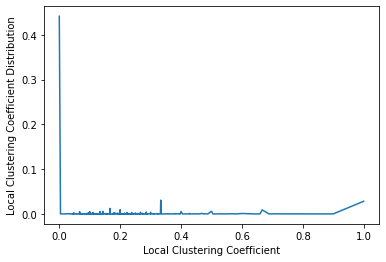

In [7]:
if __name__ == "__main__":
    main()